# Pré processamento dos dados
## Conhecendo os dados 

## Objetivos: 
    -> Criar uma cópia DataFrame, utilizando a formatação Datetime (1) ok!
    -> Armazenar a potência máxima dos dias (2) ok!
    -> Armazenar a potência máxima das semanas (3) ok!
    -> Plotar os dados dos dias (4) ok~
    -> Plotar os dados das semenas (5)

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline
path = '/home/kr0pt/Documents/Pesquisa/Codes/Dados/Dados_JPS_12B1(01_01_2008-0h0m--31_12_2013-23h45m).csv'
df_bruto = pd.read_csv(path, sep=';')

In [3]:
#conhecendo o Dataframe

df_bruto.head(n=6)

,DIA,MES,ANO,HORA,MINUTO,JPS_12B1,Unnamed: 6
0,1,1,2008,0,0,"7,90000009536743",NaN
1,1,1,2008,0,15,"7,69999980926514",NaN
2,1,1,2008,0,30,"7,69999980926514",NaN
3,1,1,2008,0,45,"7,40000009536743",NaN
4,1,1,2008,1,0,"7,40000009536743",NaN
5,1,1,2008,1,15,"7,40000009536743",NaN


##### Após JPS_12B1 existe um ponto e vírgula ";", por esse motivo o Pandas identificou a existência de uma coluna a mais que chamou de 'Unnamed: 6', o próximo passo é remove-la. 

In [4]:
#informamos em ordem, a coluna que desejamos excluir, afirmamos que a auteração deve ser feita no DF original e por fim,
#dizemos que a exclusão é aplicada na coluna. 

df_bruto.drop('Unnamed: 6', inplace=True, axis=1)
df_bruto.head()

,DIA,MES,ANO,HORA,MINUTO,JPS_12B1
0,1,1,2008,0,0,"7,90000009536743"
1,1,1,2008,0,15,"7,69999980926514"
2,1,1,2008,0,30,"7,69999980926514"
3,1,1,2008,0,45,"7,40000009536743"
4,1,1,2008,1,0,"7,40000009536743"


#### 1 - Criando uma cópia do dataframe bruto para realizar as modificações desejadas (formatação Datetime)

In [5]:
#Criando um novo dataframe para que as modificações desejadas sejam feitas

df = pd.DataFrame(columns=['Tempo','Potencia']) 

In [6]:
#Adicionando todas as datas do DF, modificados para o "formato datetime", a uma lista chamada tempo
#len(df_bruto.index) retorna a quantidade de linhas do df_bruto

tempo = []

for i in  range(len(df_bruto.index)):
   tempo.append(dt.datetime(df_bruto['ANO'].iloc[i], df_bruto['MES'].iloc[i],\
                            df_bruto['DIA'].iloc[i], df_bruto['HORA'].iloc[i], df_bruto['MINUTO'].iloc[i]))

#### Criando as colunas do novo dataframe formado

In [7]:
#a coluna Tempo é formada pela lista tempo

df['Tempo'] = tempo

In [8]:
#No dataframe bruto temos a potência na coluna coluna JPS_12B1 
#dada por uma string que representa um número e utiliza ',' como notação. Devemos alterar ',' -> ''
#além disso vamos tornar a string em um float

df['Potencia'] = df_bruto['JPS_12B1'].str.replace(',','').astype(float)

In [9]:
df.head()

,Tempo,Potencia
0,2008-01-01 00:00:00,7.900000e+14
1,2008-01-01 00:15:00,7.700000e+14
2,2008-01-01 00:30:00,7.700000e+14
3,2008-01-01 00:45:00,7.400000e+14
4,2008-01-01 01:00:00,7.400000e+14


#### 2 - Criando um novo dataframe com as potências máximas de cada dia

In [10]:
df_maxpot_dia = pd.DataFrame(columns=['Dia','Potencia Maxima']) 

In [11]:
#O método .dt.date retorna um datetime ano-mês-dia, ou seja retira as horas e minutos dos nossos dados
#A função set() retorna essa lista de datetimes sem repetições, visto que cada dia só terá uma pôt. máxima
#A função sorted() organiza a lista sem repetições de forma crescente

df_maxpot_dia['Dia'] = sorted(set(df['Tempo'].dt.date))    

#### Desejamos nesse próximo bloco realizar a escolha da potência máxima diária. Para isso foi criado um laço de repetição "for" que a cada interação estará salvando na coluna 'Potencia Maxima' o valor máximo da potência no dia representado pela linha do dataframe.

##### Explicando:

##### -> df_maxpot_dia.index retorna o número de linhas do dataframe, ou seja a quantidade de dias;

##### -> A funça range(quantidade_de_dias) retorna uma lista de 0 até a quantidade_de_dias; 
    
##### -> df.loc[df['Tempo'].dt.date == df_maxpot_dia['Dia'][linha]] retorna um Dataframe de todas as potências aferidas no dia em questão, representado pela variável "linha"; 

##### -> Ao adicionarmos ["Potência"].max(), ao dataframe de todas as potências aferidas no dia, estaremos retornando o valor máximo de potência aferido no dia;

##### -> Esse valor, é salvo no dataframe df_maxpot_dia na coluna 'Potencia Maxima' e na linha referente ao dia em questão.

In [12]:
quantidade_de_dias = len(df_maxpot_dia.index)

for linha in range(quantidade_de_dias):
    df_maxpot_dia.loc[linha, 'Potencia Maxima'] =  df.loc[df['Tempo'].dt.date == df_maxpot_dia['Dia'][linha]]['Potencia'].max()

In [13]:
df_maxpot_dia.head()

,Dia,Potencia Maxima
0,2008-01-01,8.95e+14
1,2008-01-02,9.9e+14
2,2008-01-03,9.9e+14
3,2008-01-04,9.9e+14
4,2008-01-05,9.8e+14


#### 3 - Criando um novo dataframe com as potências máximas de cada semana

In [14]:
df_maxpot_semana = pd.DataFrame(columns=['Semana','Potencia Maxima']) 
df_maxpot_semana.head()

,Semana,Potencia Maxima


#### No dataframe os dados começam a contar do dia 1 de janeiro de 2008, terça-feira, porém a primeira semana só deve ser contabilizada a partir do primeiro domingo do mês (6 de janeiro)

In [15]:
#tanto os primeros 5 dias quanto os últimos 3 dias devem ser ignorados?
semanas = (df_maxpot_dia['Dia'].count()-5)//7   

#criando a coluna com referente a semana 
df_maxpot_semana['Semana'] = [s for s in range(semanas)]
df_maxpot_semana.head()

,Semana,Potencia Maxima
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [16]:
for linha in range(semanas):
    df_maxpot_semana.loc[linha,'Potencia Maxima'] = df_maxpot_dia.iloc[5+7*linha:12+7*linha]['Potencia Maxima'].max()

In [17]:
df_maxpot_semana.head(n=15)

,Semana,Potencia Maxima
0,0,9.9e+14
1,1,9.94e+14
2,2,9.9e+14
3,3,9.9e+14
4,4,9.9e+14
5,5,9.9e+14
6,6,9.9e+14
7,7,9.9e+14
8,8,9.9e+14
9,9,9.9e+14


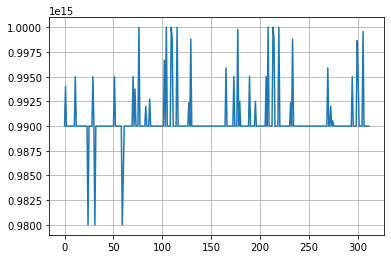

In [43]:
plt.plot(df_maxpot_semana.Semana, df_maxpot_semana['Potencia Maxima'])
plt.grid()
plt.show()

In [19]:
(df_maxpot_dia['Dia'].count()-5)//7


312

In [20]:
(df_maxpot_dia['Dia'].count()-5)%7 

3

96     7.550000e+14
97     7.400000e+14
98     7.400000e+14
99     7.200000e+14
100    7.200000e+14
           ...     
187    8.900000e+14
188    8.800000e+14
189    8.800000e+14
190    8.400000e+14
191    8.100000e+14
Name: Potencia, Length: 96, dtype: float64